# Assignment 3 Data Analysis via Pandas

The goal is to test if connectivity information combined with simple cell dynamic models can set up a situation where a
teaching relationship can be measured in the dynamic activity between grid (teacher) and place (student) populations.

## Goals 
## 1 
Get an experimentally informed connection matrix from from http://hippocampome.org/netlist
Or an excell spreadsheet of similar origin.
## 2 
Mutate the excell document into a adjacency matrix to pandas df
## 3 
Search inside the data frame, create a filtered df/matrix using only entities from the Medial Entorhinal Cortex (MEC)rt
Done

## 3.75 
Create histograms that summarize the target cells.
# 
Ascertain whether an entity is exhitatory or inhibitory and apropriately substitute in simplified versions of Fast Inhibitory, or Izhiketich excitatory.

Use PyNN instead of Neuromorphic hardware, as anything developed in PyNN can be run here.

## 4 
Use a transfer entropy toolbox to find out if grid cell behavior predicts place cell behavior, merely due to effective connectivity.

## 5
If grid cell's train place cells there should be higher directed mutual information from Grid -> Place. 

There should be lower directed mutual information from Place -> Grid.

# Don't Do:

## 4 
Search Allen Brain and NeuroElectro for physiological properties that can be modelled using the smaller list of cell type entities limited to the MEC. 
Only interested in models that can be implemented in PyNN, on SpiNNaker
## 5 
Programatically push a job to the Human Brain Collaboration Portal using:
## 6
Authenticate on the BBP using:
from bbp_client.oidc.client import BBPOIDCClient
client = BBPOIDCClient.file_auth('path_to_yaml')

## 6
https://developer.humanbrainproject.eu/docs/projects/bbp-client/0.4.4/task_service.html

## 7
https://collab.humanbrainproject.eu/#/collab/5458/nav/42545


In [4]:
import os
import pandas as pd


# Perform some system admin

import os
import pandas as pd
import sys
import matplotlib as mpl
%matplotlib inline


mpl.rcParams.update({'font.size':16})

installs = ['xlrd','pyNN','seaborn','lazyarray','neo','neuron','brian2']

def install_deps(i):
  '''
  Hack in dependencies to sys.path
  '''
  import os
  if i not in sys.path:
    os.system('pip install '+str(i))    

_ = list(map(install_deps,installs))
#import lazyarray
#import pyNN
import os
import pandas as pd



# Get some hippocampus connectivity data, based on a conversation with
# academic researchers on GH:
# https://github.com/Hippocampome-Org/GraphTheory/issues?q=is%3Aissue+is%3Aclosed
# scrape hippocamome connectivity data, that I intend to use to program neuromorphic hardware.
# conditionally get files if they don't exist.


# This connection matrix is not very informative, because it only tells you about connections dissociated From
# a stable list of cellular entities.
# path = 'netlist'
# if not os.path.exists(path):
#     os.system('wget http://hippocampome.org/netlist')
# nldf = pd.read_csv('netlist',delimiter=',').dropna()

path_xl = '_hybrid_connectivity_matrix_20171103_092033.xlsx'
if not os.path.exists(path_xl):
    os.system('wget https://github.com/Hippocampome-Org/GraphTheory/files/1657258/_hybrid_connectivity_matrix_20171103_092033.xlsx')

#import xlrd
xl = pd.ExcelFile(path_xl)
dfEE = xl.parse()
dfEE.loc[0].keys()
#dfEE =  pd.DataFrame([ (k,v) for k,v in df.items() ])


print('filter the data frame to extract only Entorhinal Cortex Entities')
#print(dfEE)
import matplotlib.pyplot as plt
dfEE


filter the data frame to extract only Entorhinal Cortex Entities


,Name,→,DG: Granule (+)2201p,DG: Hilar Ectopic Granule (+)2203p,DG: Semilunar Granule (+)2311p,DG: Mossy (+)0103,DG: Mossy MOLDEN (+)2323,DG: AIPRIM (-)2333,DG: DG Axo-Axonic (-)2233,DG: DG Basket (-)2232,...,EC: MEC LV-VI PC-Polymorph (+)000023,EC: LEC LVI Multipolar-PC (+)001133,EC: LII Axo-Axonic (-)030000,EC: MEC LII Basket (-)031000,EC: LII Basket-Multipolar (-)230000,EC: LEC LIII Multipolar (-)023000,EC: MEC LIII Multipolar (-)113220,EC: MEC LIII Superficial MPI (-)233000,EC: LIII Pyramidal-Looking (-)023300,EC: MEC LIII Superficial Trilayer (-)333000
0,↓,UniqueID,1000,1041,1001,1002,1043,1027,1010,1035,...,6052,6078,6048,6096,6053,6049,6047,6040,6087,6038
1,DG: Granule (+)2201p,1000,0,1,0,2,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,DG: Hilar Ectopic Granule (+)2203p,1041,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,DG: Semilunar Granule (+)2311p,1001,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,DG: Mossy (+)0103,1002,2,1,1,2,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
5,DG: Mossy MOLDEN (+)2323,1043,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,DG: AIPRIM (-)2333,1027,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
7,DG: DG Axo-Axonic (-)2233,1010,-2,-1,0,-2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,DG: DG Basket (-)2232,1035,-2,0,0,0,0,0,-1,-2,...,0,0,0,0,0,0,0,0,0,0
9,DG: DG BC CCK+ (-)2232,1036,-2,0,0,0,0,0,-1,-2,...,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np


    
targets = {}
for i,j in enumerate(dfEE):
  targets[j] = []
  for k,xaxis in enumerate(j):
    if xaxis=='1' or xaxis =='2':
      targets[j].extend([k])

import pandas
import numpy as np
np.matrix(targets.values())
df = pd.DataFrame(np.matrix(list(targets.values())))
from matplotlib import pyplot
matrix = df.as_matrix()


In [8]:
import pandas as pd
#dfEE =  pd.DataFrame([ (k,v) for k,v in df.items() if 'EC' in k ])

import numpy as np
np.shape(dfEE)

print(dfEE.keys())

Index(['Name', '→', 'DG: Granule (+)2201p',
       'DG: Hilar Ectopic Granule (+)2203p', 'DG: Semilunar Granule (+)2311p',
       'DG: Mossy (+)0103', 'DG: Mossy MOLDEN (+)2323', 'DG: AIPRIM (-)2333',
       'DG: DG Axo-Axonic (-)2233', 'DG: DG Basket (-)2232',
       ...
       'EC: MEC LV-VI PC-Polymorph (+)000023',
       'EC: LEC LVI Multipolar-PC (+)001133', 'EC: LII Axo-Axonic (-)030000',
       'EC: MEC LII Basket (-)031000', 'EC: LII Basket-Multipolar (-)230000',
       'EC: LEC LIII Multipolar (-)023000',
       'EC: MEC LIII Multipolar (-)113220',
       'EC: MEC LIII Superficial MPI (-)233000',
       'EC: LIII Pyramidal-Looking (-)023300',
       'EC: MEC LIII Superficial Trilayer (-)333000'],
      dtype='object', length=124)


In [20]:
print(matrix)
#sns.pairplot(df, hue="species")
from scipy.sparse import coo_matrix
m = np.matrix(matrix)
if not isinstance(matrix, coo_matrix):
    m = coo_matrix(m)
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='black')
ax.plot(m.col, m.row, 's', color='white', ms=1)
ax.set_xlim(0, m.shape[1])
ax.set_ylim(0, m.shape[0])
ax.set_aspect('equal')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.invert_yaxis()
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.figure.show()

#fig.show()
#plt.show()

print(m)

#import seaborn as sns

#sns.set(style="ticks")

#df = sns.load_dataset("iris")
#sns.pairplot(m, hue="species")


[[list([]) list([]) list([15, 16, 18]) list([29, 30]) list([25, 27, 28])
  list([14]) list([20, 22]) list([14]) list([21, 22]) list([17, 18, 20])
  list([18, 19, 21]) list([13, 15, 16]) list([12, 15]) list([14])
  list([16]) list([16]) list([]) list([]) list([30, 31, 32]) list([])
  list([22, 24, 25]) list([25, 26]) list([18, 19, 21]) list([20, 21, 22])
  list([23, 24, 25, 27]) list([29, 30]) list([19, 20, 21, 23])
  list([20, 21, 22, 24]) list([]) list([23, 24, 25]) list([]) list([])
  list([28]) list([21, 23]) list([24, 25]) list([]) list([23, 25])
  list([]) list([19, 22]) list([17, 18]) list([21, 22, 23, 24, 25])
  list([]) list([17, 18]) list([]) list([24, 25, 26]) list([2, 7, 22])
  list([2, 7, 19, 20, 22]) list([2, 7, 26, 27, 29]) list([2, 7])
  list([2, 7, 20, 21]) list([2, 7, 22, 23, 24]) list([2])
  list([2, 7, 27, 28, 30]) list([2, 7, 23, 24, 26]) list([2, 7, 28, 29])
  list([2, 7, 28, 29]) list([2, 7, 19, 20, 22]) list([2, 7, 20, 21, 23])
  list([2, 7, 28, 29]) list([2, 7])

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Below are plots of post synaptic targets in the from an arbitary source cell in the Entorhinal cortex, to targets taht are also in the EC.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


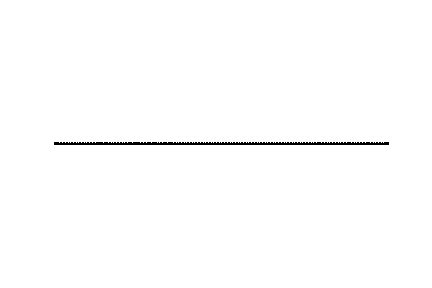

In [21]:
#print(plt.backend)
ax.figure.show()
fig.savefig('connection_matrix.png')
from IPython.display import Image
Image(filename='connection_matrix.png') 
#df
#targets
#pd.DataFrame(targets).plot.hist()
#for k,v in targets.items():
#  pd.DataFrame(v).plot.hist()
#df

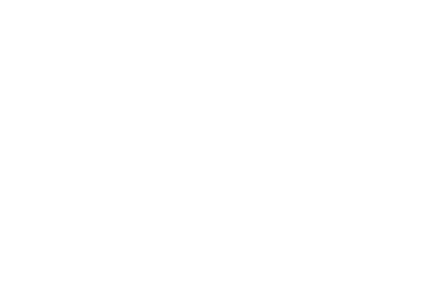

In [19]:
Image(filename='connection_matrix.png') 


In [13]:
!pip install neuron

    100% |████████████████████████████████| 81kB 2.2MB/s 
  Running setup.py bdist_wheel for brain ... - \ done
  Stored in directory: /content/.cache/pip/wheels/68/55/4d/966ed2b351fb90040ac781337186a80cb8c4377e8146f05e01
Successfully built brain


In [15]:
from pyNN import neuron as p
#p.setup(1.0)
p.setup(timestep=1.0, min_delay=1.0)

#cell_params = {'cm': 0.25, 'tau_m': 10.0, 'tau_refrac': 2.0, 'tau_syn_E': 2.5, 'tau_syn_I': 2.5, 'v_reset': -70.0, 'v_rest': -65.0, 'v_thresh': -55.0 }
#cell_params = {'a':0.1779222, 'b':-5e-09, 'c':-59.52801, 'd':0.1531787, v_init=-'73.32355','i_offset':0}#, u_init, i_offset}

#pop = p.Population(NETSIZE, p.IF_curr_exp(i_offset=0))
neuron_type = p.Izhikevich()#cell_params)
pop = p.Population(NETSIZE, neuron_type)
#for ind in pop:
print(p.connect)

pop.record("spikes")
p.run(100)
pop.set(i_offset=1.0)
p.run(100)
pop.set(i_offset=0.0)
p.run(100)
spikes = pop.get_data("spikes")
p.end()


#p.setup(1.0)
#pop = sim.Population(100, sim.IZKCurrExp(cell_params))

print(spikes)

/usr/local/lib/python3.6/dist-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")


ModuleNotFoundError: ignored

In [0]:

#nldf['From']

#nldf.index('Granule')
#df = nldf[nldf['Name']==3]


#you'll likely need a user for authentication
#user = 'gevaert'
#server = 'http://localhost:8888'
#from bbp_client.oidc.client import BBPOIDCClient
#client = BBPOIDCClient.implicit_auth(user)
#from bbp_client.task_service.client import Client
#ts = Client(server, client)
#ts.get_tasks()
#bbp_client.register_task()
#bbp_client.start_job()

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__re

,0,1,2,3,4,5,6,7,8,9,...,3226,3227,3228,3229,3230,3231,3232,3233,3234,3235
From (pre-synaptic type),Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule,...,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron,MEC LIII Superficial Trilayered Interneuron
To (post-synaptic type),Hilar Ectopic Granule,Mossy,Mossy MOLDEN,AIPRIM,DG Axo-axonic,DG Basket,DG Basket CCK+,HICAP,HIPP,HIPROM,...,MEC LV Pyramidal,MEC LV Superficial Pyramidal,LII Axo-axonic,MEC LII Basket,LII Basket-Multipolar Interneuron,LEC LIII Multipolar Interneuron,MEC LIII Multipolar Interneuron,MEC LIII Superficial Multipolar Interneuron,LIII Pyramidal-Looking Interneuron,MEC LIII Superficial Trilayered Interneuron




```
# This is formatted as code
```

